In [1]:
%pylab inline
import numpy as np
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
angle=np.array([-15,-10,-5,0,5,10,15])
N_d= np.array([0.070,0.336,4.81,10.055,11.876,1.332,0.233])
time=np.array([900,400,100,60,100,400,900])

delta_Nd= np.sqrt(N_d/(3*time))
print(delta_Nd)

[0.00509175 0.0167332  0.1266228  0.23634955 0.19896398 0.03331666
 0.00928958]


<ipython-input-3-f31b77ff665c>:2: RuntimeWarning: overflow encountered in exp
  b =  A*np.exp(-1*B*(a-C)**2)


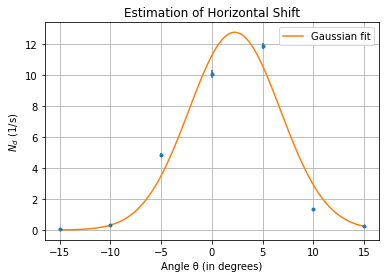

In [3]:
def Gauss(a, A, B, C):
    b =  A*np.exp(-1*B*(a-C)**2)
    return b
    
parameters, covariance = curve_fit(Gauss, angle, N_d)
  
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
  
angle_new = np.linspace(-15, 15, 100)
fit_y = Gauss(angle_new, fit_A, fit_B, fit_C)

pylab.errorbar(angle,N_d, yerr= delta_Nd, fmt='o', markersize=3)
pylab.plot(angle_new, fit_y, '-', label='Gaussian fit')
pylab.xlabel('Angle θ (in degrees)')
pylab.ylabel('$N_d$' " (1/s)")
pylab.title('Estimation of Horizontal Shift')
pylab.legend()
pylab.grid()

In [4]:
B=fit_C
print(B) #mean of gaussian, which is nothing but B

2.242550514673947


In [5]:
N= abs(2*np.pi*np.sin(np.radians(angle-B))*N_d)
delta_N= abs(2*np.pi*np.sin(np.radians(angle-B))*delta_Nd)

print(N)
print(delta_N)

[0.13037118 0.44767071 3.81010252 2.4721263  3.58977582 1.12967299
 0.32328276]
[0.00948311 0.02229453 0.10030059 0.058109   0.06014113 0.02825596
 0.0128891 ]


In [6]:
f_theta= 1/(np.sin(np.radians(angle-B)/2))**4

print(f_theta)

[1.98045378e+03 7.73443953e+03 6.28349251e+04 6.81949885e+06
 2.98365019e+06 4.77597178e+04 6.56364506e+03]


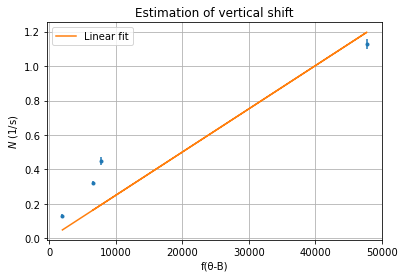

In [7]:
#Least square fit
x=np.delete(f_theta,[2,3,4]) #delete values for 0,+5,-5 degrees
y=np.delete(N,[2,3,4])
slope= np.sum(x*y)/np.sum(x**2)
delta_m= np.sqrt((np.sum(y-slope*x))/(3*np.sum(x**2)))

y_fit= slope*x

pylab.errorbar(x,y, yerr= np.delete(delta_N,[2,3,4]), fmt='o', markersize=3)
pylab.plot(x, y_fit, '-', label='Linear fit')
pylab.xlabel('f(θ-B)')
pylab.ylabel('$N$' " (1/s)")
pylab.title('Estimation of vertical shift')
pylab.legend()
pylab.grid()

In [8]:
print(slope, delta_m) # A parameter

2.504190297786342e-05 7.723867145627656e-06
